## Step 2

#### Importing Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection 
import sklearn.metrics 
import sklearn.linear_model
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv("insurance.csv")

## Step 3

In [12]:
df.head(5) #First 5 rows are shown below

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.471
4,32,male,28.880,0,no,northwest,3866.855


In [13]:
df.shape #number of column and rows of df;

(1338, 7)

In [14]:
df.info()  #general informations about df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


As we can see, we have several d-types features. *'Object'* d-type features are *string* and categorical values.

In [15]:
df.isnull().sum() #Null values are checked

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [16]:
pd.options.display.float_format='{:.3f}'.format
df.describe()  # We should check the statistical summary about each column

,age,bmi,children,charges
count,1338.000,1338.000,1338.000,1338.000
mean,39.207,30.663,1.095,13270.422
std,14.050,6.098,1.205,12110.011
min,18.000,15.960,0.000,1121.874
25%,27.000,26.296,0.000,4740.287
50%,39.000,30.400,1.000,9382.033
75%,51.000,34.694,2.000,16639.913
max,64.000,53.130,5.000,63770.428


### Exploratory Data Analysis

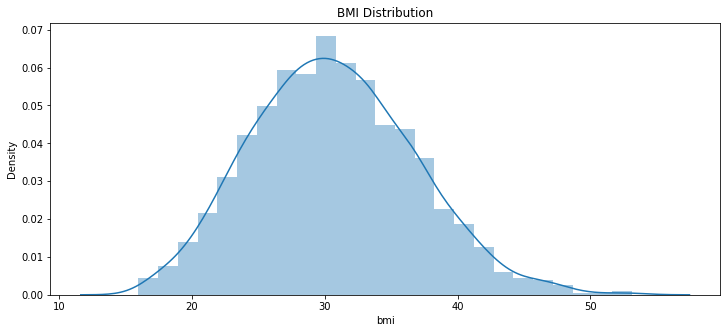

In [17]:
#Distribution of bmi
plt.figure(figsize=(12,5))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()


Category	BMI range - kg/m2

*   Severe Thinness	< 16
*   Moderate Thinness	16 - 17
*   Mild Thinness	17 - 18.5
*   Normal	18.5 - 25
*   Overweight	25 - 30
*   Obese Class I	30 - 35
*   Obese Class II	35 - 40
*   Obese Class III	> 40

According to this data, more than half of people are obese.

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

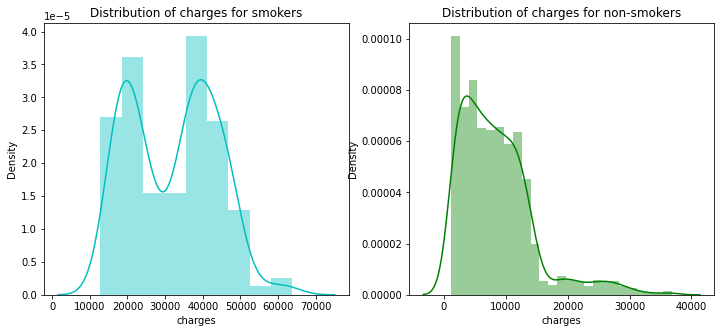

In [18]:
f= plt.figure(figsize=(12,5))
ax=f.add_subplot(121)
sns.distplot(df[(df.smoker == 'yes')]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(df[(df.smoker == 'no')]["charges"],color='g',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

Smoking people spend more money for medical treatment than non-smoking people.

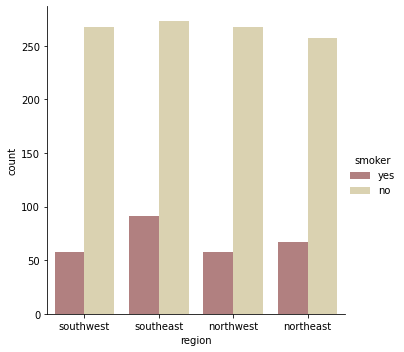

In [19]:
sns.catplot(x="region", kind="count",hue = 'smoker', palette="pink", data=df)

Number of non-smoking people are greater than smoking people. Also, southeast region has the most smokers.

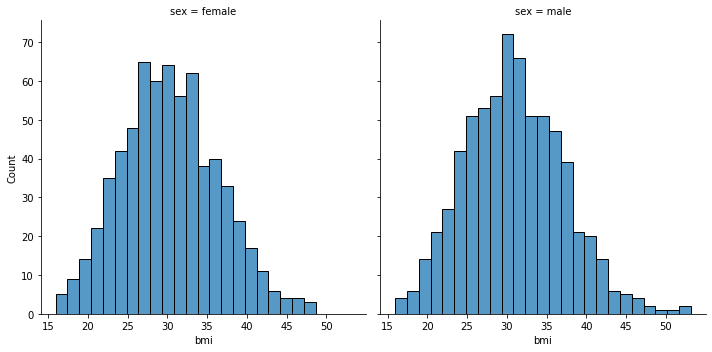

In [20]:
sns.displot(df, x="bmi", col="sex")

Under 30  BMI is almost same, but unhealthy people, have bigger than 30 BMI are mostly men.
Clear difference starts at 50 and more bmi

southeast 382


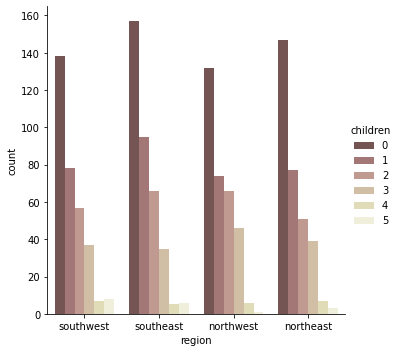

In [21]:
sns.catplot(x='region', kind="count",hue = 'children', palette="pink", data=df)

regions = list(df['region'].unique())
Dict = {}
for i in regions:
  count = df[(df.region == '{0}'.format(i))]['children'].sum()
  Dict['{0}'.format(i)] = count

max = 0
for a,b in Dict.items():
  if b > max:
    max = b
    name = a
print(name,max)

Most of the people have no child.
There are few people have 4 and 5 children.

Text(0, 0.5, 'BMI')

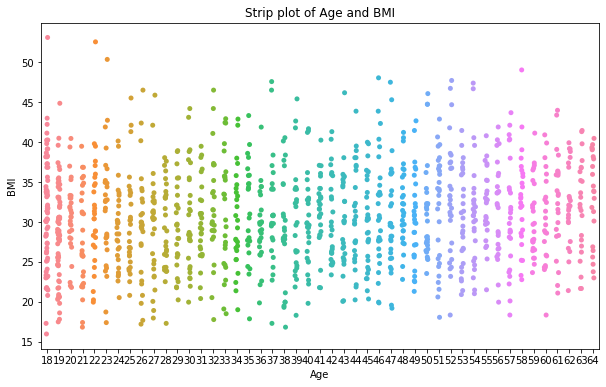

In [22]:
plt.figure(figsize=(10,6))
ax = sns.stripplot(x='age',y='bmi',data=df)
ax.set_title('Strip plot of Age and BMI')
ax.set_xlabel('Age')
ax.set_ylabel('BMI')

Obesity is more common in younger people.

Elder people have least variance of bmi



Text(0, 0.5, 'BMI')

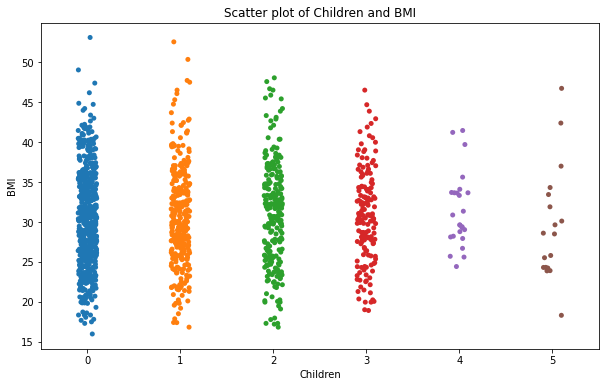

In [23]:
plt.figure(figsize=(10,6))
ax = sns.stripplot(x='children',y='bmi',data=df)
ax.set_title('Scatter plot of Children and BMI')
ax.set_xlabel('Children')
ax.set_ylabel('BMI')

The people who have fewer children more prone to being obese

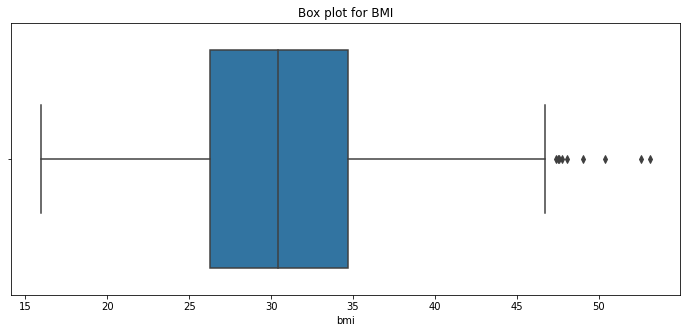

In [24]:
plt.figure(figsize=(12,5))
plt.title("Box plot for BMI")
sns.boxplot(df['bmi'])

Average bmi is between 25-35. But, there are small number of people have 45 bmi and over. It is a outlier.

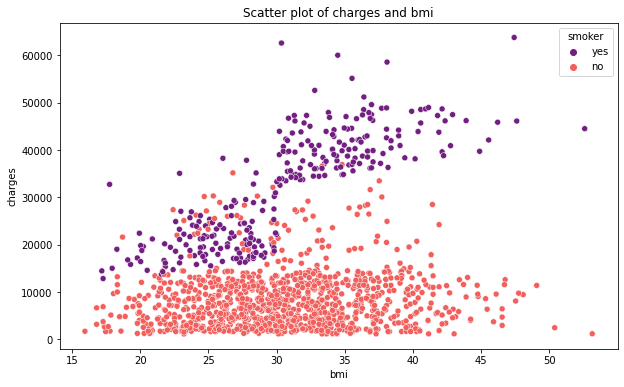

<Figure size 720x432 with 0 Axes>

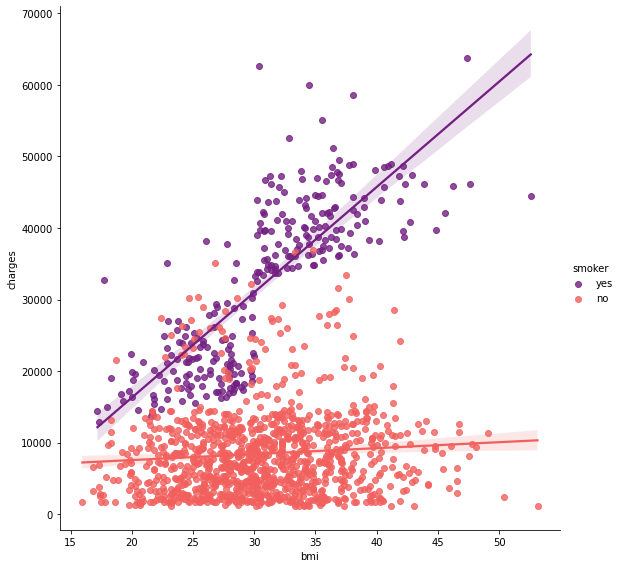

In [25]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=df,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

plt.figure(figsize=(10,6))
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df, palette = 'magma', size = 8)

The people who have bigger than 30 bmi prone

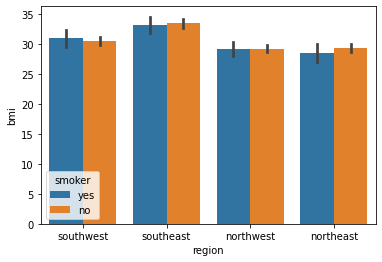

In [26]:
ax = sns.barplot(x="region", y="bmi", hue="smoker", data=df)

According to BMI there is no differences between smokers and non-smokers.

Most BMI is in the Southeast region.

## Step 4 Veri ön işlemesi

In [27]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Firstly, we have to reorder columns, because of encoding. When we apply one-hot-encoding to features, encoded features are appended at the end of the dataframe

In [28]:
#reordering columns
df = df[['charges','age','bmi','children','sex','smoker','region']]

In [29]:
df.head()

,charges,age,bmi,children,sex,smoker,region
0,16884.924,19,27.900,0,female,yes,southwest
1,1725.552,18,33.770,1,male,no,southeast
2,4449.462,28,33.000,3,male,no,southeast
3,21984.471,33,22.705,0,male,no,northwest
4,3866.855,32,28.880,0,male,no,northwest


In [30]:
#We want to seperate real values and encoded values
df_encoded = df.copy()

In [31]:
df.head()

,charges,age,bmi,children,sex,smoker,region
0,16884.924,19,27.900,0,female,yes,southwest
1,1725.552,18,33.770,1,male,no,southeast
2,4449.462,28,33.000,3,male,no,southeast
3,21984.471,33,22.705,0,male,no,northwest
4,3866.855,32,28.880,0,male,no,northwest


In [32]:
# from sklearn.preprocessing import LabelEncoder
# #sex
# le = LabelEncoder()
# le.fit(df_encoded.sex.drop_duplicates()) 
# df_encoded.sex = le.transform(df_encoded.sex)
# # smoker or not
# le.fit(df_encoded.smoker.drop_duplicates()) 
# df_encoded.smoker = le.transform(df_encoded.smoker)
# #region
# le.fit(df_encoded.region.drop_duplicates()) 
# df_encoded.region = le.transform(df_encoded.region)

# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()
# categorical_cols = ['sex', 'smoker', 'region']
# #One-hot-encode the categorical columns.
# #Unfortunately outputs an array instead of dataframe.
# array_hot_encoded = ohe.fit_transform(df[categorical_cols])

# #Convert it to df
# data_hot_encoded = pd.DataFrame(array_hot_encoded, index=df.index)

# #Extract only the columns that didnt need to be encoded
# data_other_cols = df.drop(columns=categorical_cols)

# #Concatenate the two dataframes : 
# df_encoded = pd.concat([data_hot_encoded, data_other_cols], axis=1)

categorical_cols = ['sex','smoker','region']
df_encoded= pd.get_dummies(df, columns=categorical_cols)

There are several types of encoding methods : 
*   Label Encoding
*   One-Hot Encoding(aka pd.get_dummies)

**Label Encoding:** It is used for target values,which are y. However, if you are lazy to use one hot encoding you can also use it.

**One-Hot Encoding:** Also known as Dummy Encoding, One-Hot Encoding is a method to encode categorical variables, where no such ordinal relationship exists, to numerical data that Machine Learning algorithms can deal with.One hot encoding creates new, binary columns, indicating the presence of each possible value from the original data. These columns store ones and zeros for each row, indicating the categorical value of that row.






In [33]:
df_encoded

,charges,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,16884.924,19,27.900,0,1,0,0,1,0,0,0,1
1,1725.552,18,33.770,1,0,1,1,0,0,0,1,0
2,4449.462,28,33.000,3,0,1,1,0,0,0,1,0
3,21984.471,33,22.705,0,0,1,1,0,0,1,0,0
4,3866.855,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,10600.548,50,30.970,3,0,1,1,0,0,1,0,0
1334,2205.981,18,31.920,0,1,0,1,0,1,0,0,0
1335,1629.833,18,36.850,0,1,0,1,0,0,0,1,0
1336,2007.945,21,25.800,0,1,0,1,0,0,0,0,1


In [34]:
X = df_encoded.iloc[:, 1:].values
y = df_encoded.iloc[:, 0].values

Features and target values are seperated.

In [35]:
X

array([[19.  , 27.9 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [18.  , 33.77,  1.  , ...,  0.  ,  1.  ,  0.  ],
       [28.  , 33.  ,  3.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  , 36.85,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [21.  , 25.8 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [61.  , 29.07,  0.  , ...,  1.  ,  0.  ,  0.  ]])

In [36]:
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [44]:
# train and test sets are created
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [45]:
X_train

array([[53.  , 26.6 ,  0.  , ...,  1.  ,  0.  ,  0.  ],
       [53.  , 21.4 ,  1.  , ...,  0.  ,  0.  ,  1.  ],
       [18.  , 37.29,  0.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [51.  , 34.96,  2.  , ...,  0.  ,  0.  ,  0.  ],
       [40.  , 22.22,  2.  , ...,  0.  ,  1.  ,  0.  ],
       [57.  , 27.94,  1.  , ...,  0.  ,  1.  ,  0.  ]])

In [46]:
y_train.shape

(1070,)

As you see, y_train set is a vector.We should reshape it to process 

In [47]:
y_train

array([10355.641 , 10065.413 ,  1141.4451, ..., 44641.1974, 19444.2658,
       11554.2236])

In [48]:
y_train.ndim

1

In [49]:
y_train = y_train.reshape(-1, 1)

In [50]:
y_train.shape

(1070, 1)

In [65]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train[:, 0:2] = sc_X.fit_transform(X_train[:, 0:2])
y_train = sc_y.fit_transform(y_train)

X_test[:,0:2] = sc_X.transform(X_test[:,0:2])
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train[:, 0:2] = sc.fit_transform(X_train[:, 0:2])
# X_test[:, 0:2] = sc.transform(X_test[:, 0:2])

**Standardization** of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

In [66]:
X_train

array([[ 1.00228629, -0.66474472,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.00228629, -1.51402369,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [-1.50426607,  1.08117685,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.85905473,  0.70063454,  2.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.07128113, -1.38009893,  2.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.28874942, -0.44589206,  1.        , ...,  0.        ,
         1.        ,  0.        ]])

In [67]:
X_test

array([[-1.43265029,  0.79372858,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.28874942,  0.1420703 ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.85905473,  1.03381321,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.5725916 ,  1.35065959,  2.        , ...,  0.        ,
         1.        ,  0.        ],
       [-1.43265029,  0.96440099,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.28679778, -0.74232309,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [68]:
y_train

array([[-0.23802019],
       [-0.26205207],
       [-1.00098731],
       ...,
       [ 2.60094183],
       [ 0.51454921],
       [-0.13877343]])

## Step 5

#### Model egitim

In [69]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor(random_state = 0)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [70]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators = 10, random_state = 0)
random_forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [71]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

SVR()

#### Cross validation

In [72]:
def calculate_cross_val(regressor):
  from sklearn.model_selection import cross_val_score
  scores = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
  print("Score: {:.2f} %".format(scores.mean()*100))
  print("Standard Deviation: {:.2f} %".format(scores.std()*100))

In [73]:
print("----Decision Tree----")
calculate_cross_val(decision_tree)
print("----Random Forest----")
calculate_cross_val(random_forest)
print("---------SVR---------")
calculate_cross_val(svr)

----Decision Tree----
Score: 69.36 %
Standard Deviation: 9.15 %
----Random Forest----
Score: 81.67 %
Standard Deviation: 3.64 %
---------SVR---------
Score: 82.94 %
Standard Deviation: 4.08 %


It is clearly defined decision tree is the worst model for this data. For now, we may use both random forest and svr. But, We'll see...

### Prediction

Some preprocessing for prediction

In [82]:
X_test.shape

(268, 11)

In [83]:
X_test[:5]

array([[-1.43265029,  0.79372858,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [ 1.28874942,  0.1420703 ,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [ 0.85905473,  1.03381321,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.71582317,  0.97338375,  3.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [-1.28941873, -1.36703309,  1.        ,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ]])

In [84]:
X_test.ndim

2

In [80]:
(svr.predict(X_test)).shape

(268,)

In [81]:
(svr.predict(X_test)).reshape(-1, 1).shape

(268, 1)

In [85]:
y_pred_svr = sc_y.inverse_transform((svr.predict(X_test)).reshape(-1, 1))
y_pred_decision_tree = sc_y.inverse_transform((decision_tree.predict(X_test)).reshape(-1, 1))
y_pred_random_forest = sc_y.inverse_transform((random_forest.predict(X_test)).reshape(-1, 1))

Let's see approximations of our model to test values

In [87]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_svr.reshape(len(y_pred_svr),1), y_test.reshape(len(y_test),1)),1)[:5])

[[ 2822.31  1646.43]
 [12477.1  11353.23]
 [ 9994.1   8798.59]
 [12006.72 10381.48]
 [ 1878.15  2103.08]]


#### GridSearch

In [88]:
from sklearn.model_selection import GridSearchCV
parameters_svr = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
                  {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search_svr = GridSearchCV(estimator = svr,
                           param_grid = parameters_svr,
                           scoring = 'neg_mean_squared_error',
                           cv = 10,
                           n_jobs = -1)
grid_search_svr.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
                         {'C': [0.25, 0.5, 0.75, 1],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error')

In [94]:
# Define Parameters
parameters_random_forest = { 
    'n_estimators': [75,100,125,150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['squared_error', 'absolute_error', 'poisson']
}
grid_search_random_forest = GridSearchCV(estimator = random_forest,
                           param_grid = parameters_random_forest,
                           scoring = 'neg_mean_squared_error',
                           cv = 10,
                           n_jobs = -1)

grid_search_random_forest.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(n_estimators=10, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [75, 100, 125, 150]},
             scoring='neg_mean_squared_error')

In [95]:
# Define Parameters
parameters_decision_tree = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'splitter': ['best', 'random'],
    'criterion' :['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}
grid_search_decision_tree = GridSearchCV(estimator = decision_tree,
                           param_grid = parameters_decision_tree,
                           scoring = 'neg_mean_squared_error',
                           cv = 10,
                           n_jobs = -1)

grid_search_decision_tree.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

### Metrics

In [96]:
def grid_search_metric(grid_search):
  best_accuracy = grid_search.best_score_
  best_parameters = grid_search.best_params_
  print("MSE: {:.2f}".format(np.abs(best_accuracy*100)))
  print("Best Parameters:", best_parameters)

In [104]:
from sklearn.metrics import mean_squared_error,r2_score,max_error
print("Mean ")
print("SVR : ",mean_squared_error(y_test, y_pred_svr))
print("Random Forest : ",mean_squared_error(y_test, y_pred_random_forest))
print("Decision Tree : ",mean_squared_error(y_test, y_pred_decision_tree))
print("---------------------")
print("R2_score")
print("SVR : ",r2_score(y_test, y_pred_svr))
print("Random Forest : ",r2_score(y_test, y_pred_random_forest))
print("Decision Tree : ",r2_score(y_test, y_pred_decision_tree))


Mean 
SVR :  20490030.8984762
Random Forest :  25169830.112428956
Decision Tree :  39607220.00639182
---------------------
R2_score
SVR :  0.8627415386751718
Random Forest :  0.831392535708853
Decision Tree :  0.7346794593737977


In [106]:
print("Grid Search SVR")
grid_search_metric(grid_search_svr)
print("Grid Search Random Forest")
grid_search_metric(grid_search_random_forest)
print("Grid Search Decision Tree")
grid_search_metric(grid_search_decision_tree)

Grid Search SVR
MSE: 16.59
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Grid Search Random Forest
MSE: 16.10
Best Parameters: {'criterion': 'squared_error', 'max_features': 'sqrt', 'n_estimators': 125}
Grid Search Decision Tree
MSE: 28.51
Best Parameters: {'criterion': 'friedman_mse', 'max_features': 'auto', 'splitter': 'best'}


As a result of, Random Forest is best model for this data.